## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data.csv",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
df.mean()

WTT             0.949682
PTI             1.114303
EQW             0.834127
SBI             0.682099
LQE             1.032336
QWG             0.943534
FDJ             0.963422
PJF             1.071960
HQE             1.158251
NXJ             1.362725
TARGET CLASS    0.500000
dtype: float64

<Axes: >

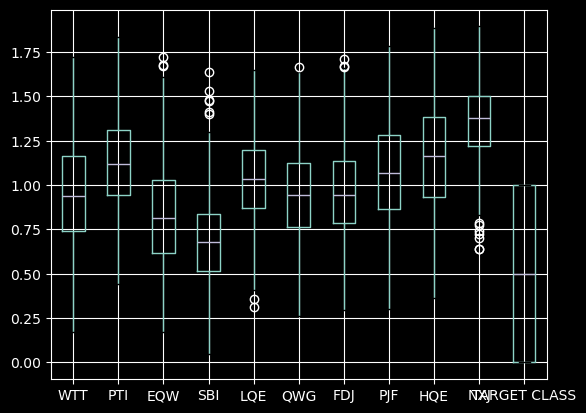

In [7]:
df.boxplot()

In [8]:
# Replacing Outliers
def replace_outliers(df, column_name):
    # Calculateing the 5th and 95th percentiles
    for i in column_name:
        lower_bound = df[i].quantile(0.05)
        upper_bound = df[i].quantile(0.95)
        
        # Replace values below the 5th percentile with the 5th percentile value
        df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else x)
        
        # Replace values above the 95th percentile with the 95th percentile value
        df[i] = df[i].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df

In [9]:
replace_outliers(df, df.columns)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.541643,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.659126,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.437827,0.720781,1.403975,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.403975,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.593609,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.559083,0.593609,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.437827,0.943859,0.855806,1.061338,1.277456,1.188063,1


<Axes: >

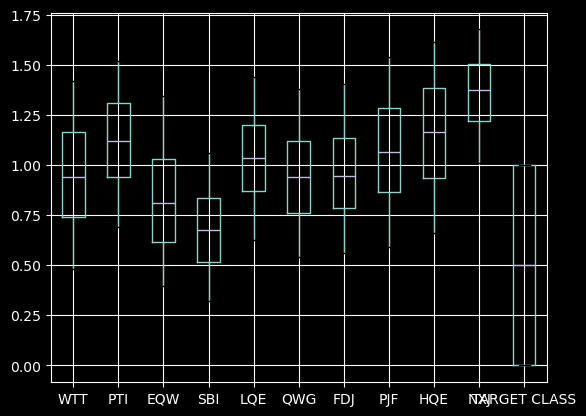

In [10]:
df.boxplot()

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.129177,0.196239,-0.971823,0.359982,-1.117925,-1.689565,-0.862705,-1.580818,-1.000358,-0.703621
1,-1.158659,-0.467641,-1.091777,0.695136,-0.481231,-1.241542,-1.222383,-0.216536,-1.790362,0.691402
2,-0.841520,0.361505,0.330764,0.838165,1.802100,-0.938137,1.884160,0.303488,-0.719012,-0.414318
3,1.055686,1.138088,-0.658724,0.695039,0.489471,-0.290697,1.884160,1.135601,1.306468,-1.121748
4,1.223217,-0.693916,-0.753522,-0.053046,0.889646,-1.009671,0.654660,-1.570143,1.095318,0.298803


## Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [19]:
print(confusion_matrix(y_test,pred))

[[144  16]
 [  5 135]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       160
           1       0.89      0.96      0.93       140

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [21]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

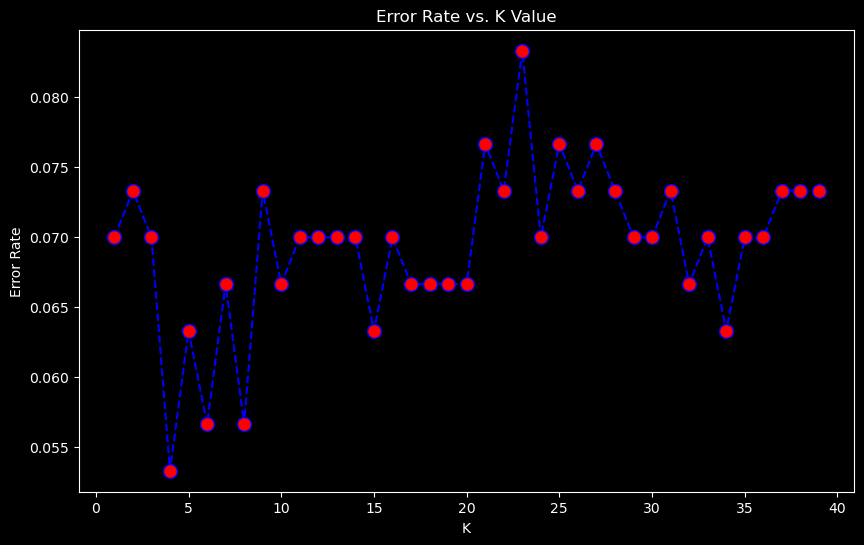

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [23]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[144  16]
 [  5 135]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       160
           1       0.89      0.96      0.93       140

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



The model with  𝐾=23
K=23 performs better than the model with For 𝐾=3 achieving higher precision, recall, F1-score, and accuracy across both classes. The results suggest that increasing 𝐾, K improves the classification performance significantly.

In [24]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[141  19]
 [  6 134]]


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       160
           1       0.88      0.96      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
X_train

array([[ 0.99775496, -0.44061449, -0.67895103, ..., -0.16825729,
        -0.97861973, -1.14999808],
       [ 0.1956625 , -0.71598873, -1.59434679, ..., -0.64999642,
         0.26708239, -0.34120596],
       [-0.95779783,  1.70487894,  1.75240576, ..., -0.56982887,
         0.17649211,  0.12146505],
       ...,
       [-0.05854187,  1.34412625, -0.1643998 , ...,  1.3802121 ,
        -1.44919624,  0.86640758],
       [ 0.80899715,  0.36254194,  0.37727114, ..., -1.3835843 ,
         1.39347306,  0.29375998],
       [-1.4327048 ,  0.14558577,  0.28265991, ...,  0.93785332,
        -1.79036219, -1.79336081]])

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [29]:
predictions = dtree.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       160
           1       0.91      0.89      0.90       140

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



The model achieves an accuracy of 0.85 across 300 instances, with both macro and weighted averages for precision, recall, and F1-score also at 0.85, indicating balanced performance across classe

In [31]:
print(confusion_matrix(y_test,predictions))

[[147  13]
 [ 15 125]]


In [32]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth = 1)

In [33]:
pd.DataFrame({'features':df.drop('TARGET CLASS',axis=1).columns, 'importance':dtree.feature_importances_})

,features,importance
0,WTT,0.184216
1,PTI,0.021907
2,EQW,0.130608
3,SBI,0.013025
4,LQE,0.030741
5,QWG,0.042486
6,FDJ,0.002640
7,PJF,0.134265
8,HQE,0.428084
9,NXJ,0.012028


[Text(0.40207538167938933, 0.9545454545454546, 'HQE <= -0.265\ngini = 0.5\nsamples = 700\nvalue = [340.0, 360.0]\nclass = Y'),
 Text(0.15839694656488548, 0.8636363636363636, 'EQW <= -0.701\ngini = 0.254\nsamples = 274\nvalue = [233, 41]\nclass = N'),
 Text(0.04580152671755725, 0.7727272727272727, 'WTT <= -0.837\ngini = 0.418\nsamples = 37\nvalue = [11, 26]\nclass = Y'),
 Text(0.030534351145038167, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.061068702290076333, 0.6818181818181818, 'QWG <= 1.036\ngini = 0.305\nsamples = 32\nvalue = [6, 26]\nclass = Y'),
 Text(0.030534351145038167, 0.5909090909090909, 'LQE <= 1.161\ngini = 0.137\nsamples = 27\nvalue = [2, 25]\nclass = Y'),
 Text(0.015267175572519083, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = Y'),
 Text(0.04580152671755725, 0.5, 'PTI <= -1.321\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.030534351145038167, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]

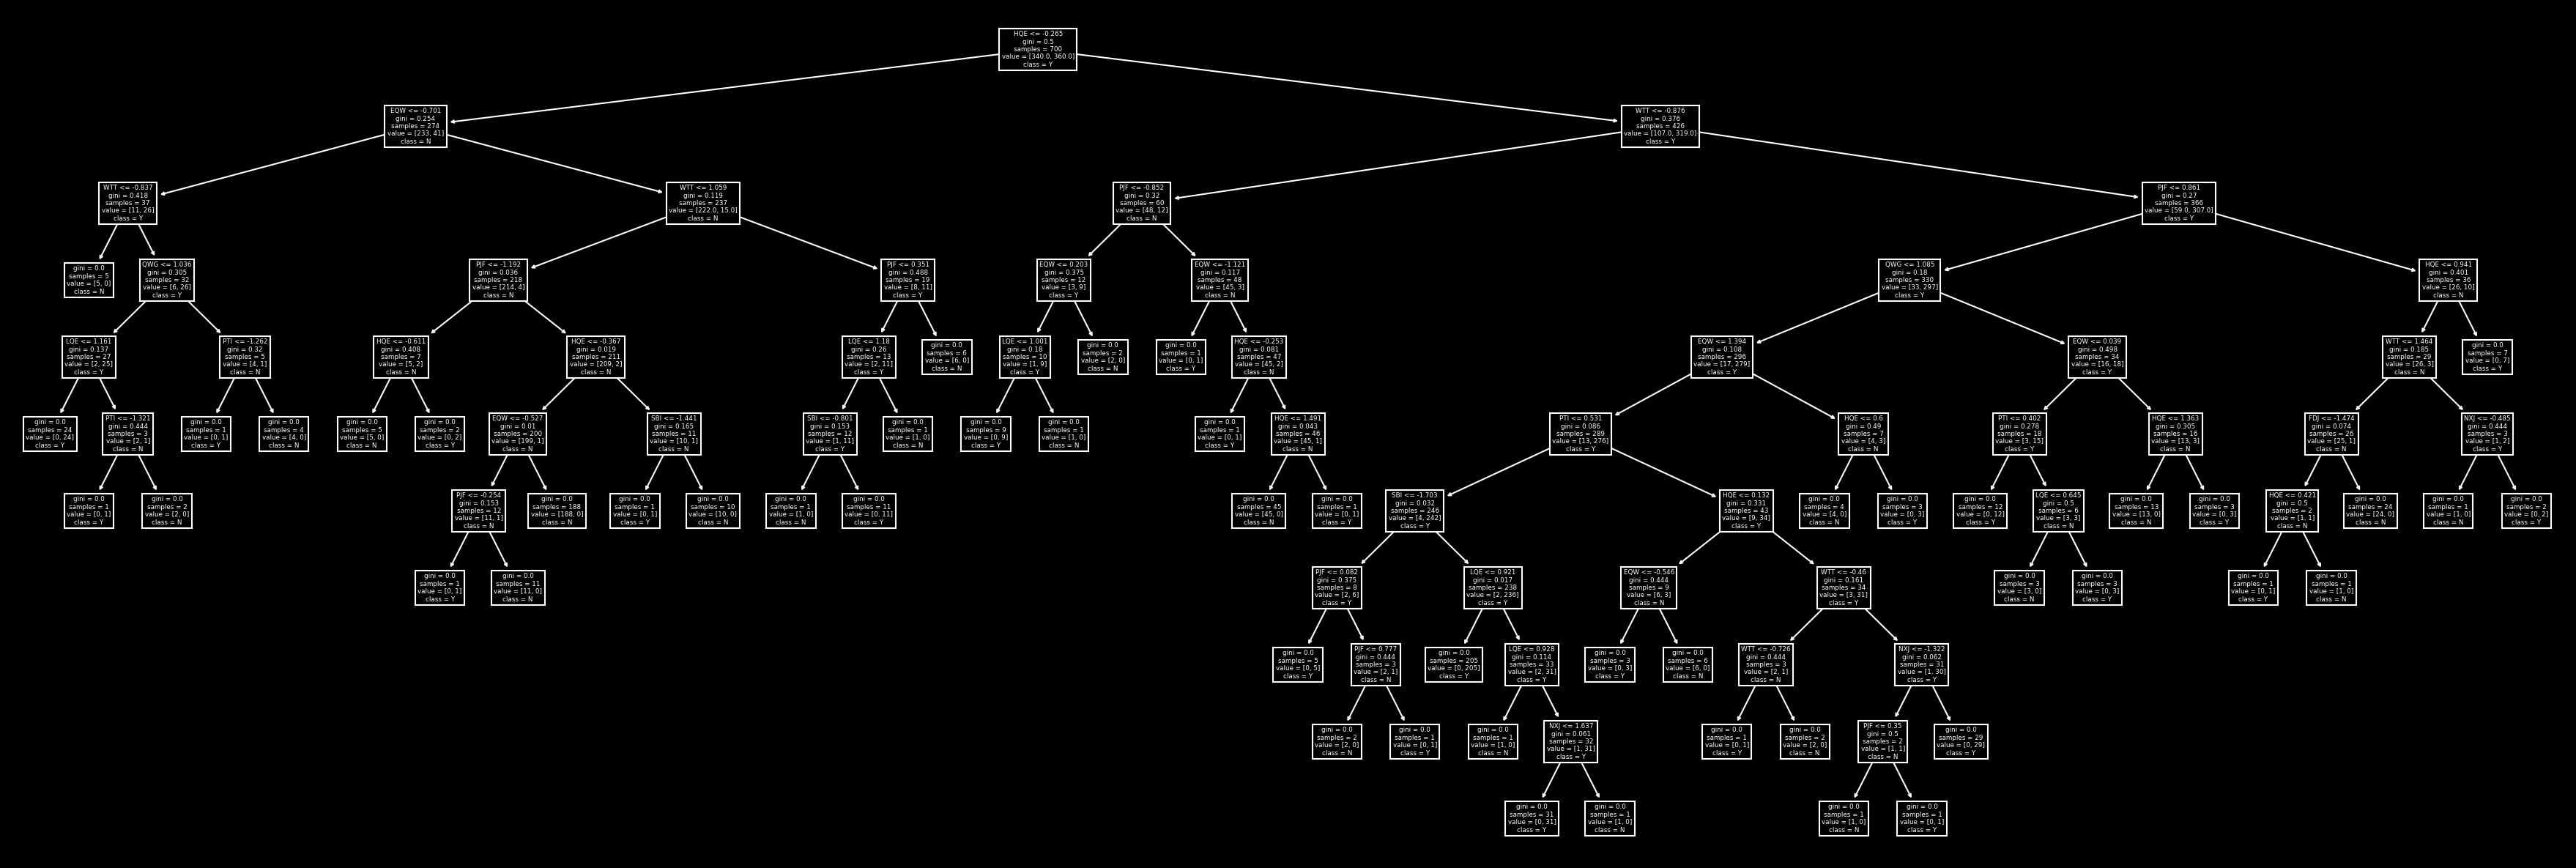

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10), dpi=150)
plot_tree(dtree,feature_names=df.drop('TARGET CLASS',axis=1).columns,class_names=['N','Y'])

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       160
           1       0.94      0.96      0.95       140

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [39]:
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

In [40]:
X_test['prob'] = logmodel.predict_proba(X_test)[:, 1]
X_test['prob']

c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0      0.013559
1      0.000968
2      0.292986
3      0.999947
4      0.001360
         ...   
295    0.998746
296    0.000016
297    0.000474
298    0.000623
299    0.999067
Name: prob, Length: 300, dtype: float64

In [41]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [42]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X_test['prob'] > threshold).astype(int)
    cm = confusion_matrix(y_test,predictions)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(y_test,predictions)})

In [43]:
auc = roc_auc_score(y_test, X_test['prob'])

In [44]:
print(df_ROC)
print('AUC:', auc)

    Threshold     TP     TN   FP   FN       TPR      FPR
0         0.0  134.0  151.0  9.0  6.0  0.957143  0.05625
1         0.1  134.0  151.0  9.0  6.0  0.957143  0.05625
2         0.2  134.0  151.0  9.0  6.0  0.957143  0.05625
3         0.3  134.0  151.0  9.0  6.0  0.957143  0.05625
4         0.4  134.0  151.0  9.0  6.0  0.957143  0.05625
5         0.5  134.0  151.0  9.0  6.0  0.957143  0.05625
6         0.6  134.0  151.0  9.0  6.0  0.957143  0.05625
7         0.7  134.0  151.0  9.0  6.0  0.957143  0.05625
8         0.8  134.0  151.0  9.0  6.0  0.957143  0.05625
9         0.9  134.0  151.0  9.0  6.0  0.957143  0.05625
10        1.0  134.0  151.0  9.0  6.0  0.957143  0.05625
AUC: 0.98875


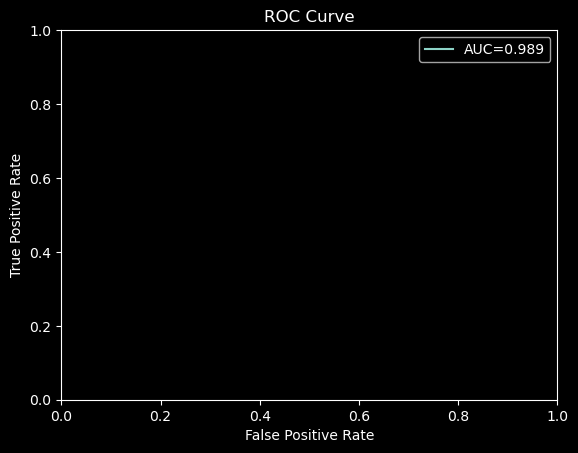

In [45]:
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

We can infer that The classification model performs consistently across different thresholds, with a high True Positive Rate (TPR = 0.953) and a low False Positive Rate (FPR = 0.053) at each threshold. The model's overall performance is excellent, as indicated by the high AUC score of 0.989.